<a href="https://colab.research.google.com/github/smartfarmer1997/first-repository/blob/master/12_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 12-2. Boston 주택 가격 예측 모델

# 데이터 로드 및 전처리
- 먼저 데이터를 불러와 확인해 보고 전처리를 해 봅시다.
- 데이터셋은 keras.datasets에서 불러올 수 있는 boston_housing 데이터셋을 활용합니다.

In [35]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [36]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [37]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = test_data - mean
test_data = test_data / std

In [38]:
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


# 모델 구성 및 컴파일
- 주택 가격 예측을 위한 딥러닝 모델을 구성하고 컴파일합니다.
- Sequential() 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성해 보세요.

In [39]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
# [[YOUR CODE]]

model = models.Sequential()
model.add(layers.Input(shape=(train_data.shape[1], )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.summary()

model.compile(loss='mse',
              optimizer='Adam',
              metrics=['mae'])


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

# 모델 학습
- epochs와 batch size는 자유롭게 설정해 보세요. 모델 학습 후에는 모델 학습 결과를 시각화해 보세요.

In [40]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
# [[YOUR CODE]]

history = model.fit(train_data,
                    train_labels,
                    epochs=100,
                    batch_size=16,
                    validation_split=0.2,
                    )


Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 541.3861 - mae: 21.4556 - val_loss: 549.3597 - val_mae: 21.6825
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 475.1829 - mae: 19.6648 - val_loss: 419.1191 - val_mae: 18.6468
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 291.5682 - mae: 15.2750 - val_loss: 241.1294 - val_mae: 13.4893
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 154.7201 - mae: 10.3974 - val_loss: 93.8218 - val_mae: 7.2449
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 70.2454 - mae: 6.3881 - val_loss: 53.9232 - val_mae: 5.7675
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 34.3518 - mae: 4.4306 - val_loss: 38.6420 - val_mae: 4.7582
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 32.8124 - mae: 4.2399 - val_loss: 29.2615 - val_mae: 4.1233
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 31.6665 - mae: 3.9678 - val_loss: 23.8711 - val_mae: 3.8635
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━

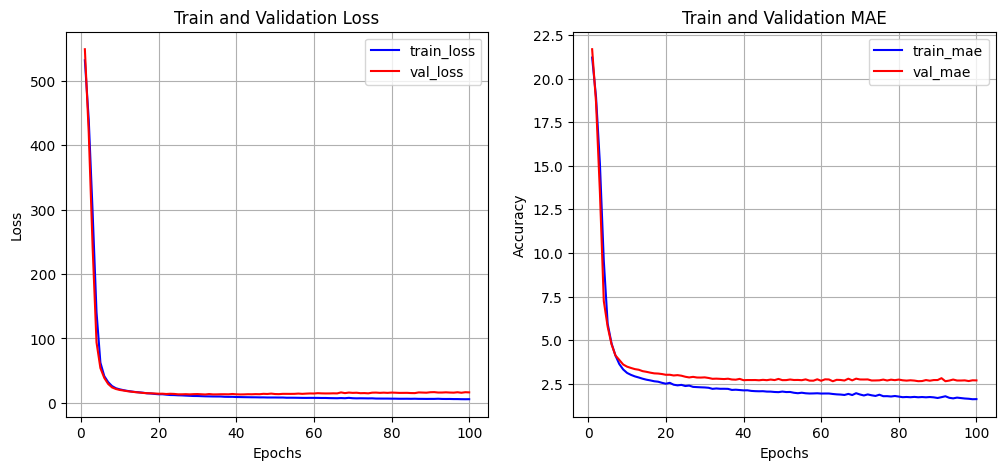

In [41]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
# plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [42]:
model.evaluate(test_data, test_labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 19.1089 - mae: 2.7867


[23.762197494506836, 2.9336745738983154]

# 12-3. Reuters 딥러닝 모델

# 데이터 로드 및 전처리

- reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다. 데이터셋은 keras.datasets에서 불러올 수 있는 reuters 데이터 셋을 활용하고, 이때 파라메터 조정을 통해 단어의 개수는 10000개로 제한합니다(num_words=10000).
- 데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.
- 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [44]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
# [[YOUR CODE]]

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels,
                                                  test_size=0.25,
                                                  random_state=111)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
6736
2246
2246
46


- 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다. 원-핫 인코딩 함수를 직접 만들어보세요.
- 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.

In [45]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)


# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.

y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

# 모델 구성 및 컴파일

- BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 46개의 뉴스 주제를 분류하는 딥러닝 모델을 구성합니다.

In [46]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]

from tensorflow.keras import models, layers

model = models.Sequential()

# 입력층 + 첫 번째 Dense 블록
model.add(layers.Input(shape=(x_train.shape[1], )))                # InputLayer
model.add(layers.Dense(128))                         # Dense
model.add(layers.BatchNormalization())                    # BatchNormalization
model.add(layers.Activation('relu'))                   # Activation
model.add(layers.Dropout(0.5))                     # Dropout

# 두 번째 Dense 블록
model.add(layers.Dense(128))                         # Dense
model.add(layers.BatchNormalization())                    # BatchNormalization
model.add(layers.Activation('relu'))                   # Activation
model.add(layers.Dropout(0.5))                     # Dropout

# 출력층
model.add(layers.Dense(46, activation='softmax', name='output'))     # Output layer


model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 128)            │     1,280,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,303,598 (4.97 MB)

 Trainable params: 1,303,086 (4.97 MB)

 Non-trainable params: 512 (2.00 KB)

# 모델 학습

- ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [47]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('Reuters_model.h5',
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4691 - loss: 2.4033

211/211 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.4696 - loss: 2.4009 - val_accuracy: 0.7057 - val_loss: 1.4828
Epoch 2/60
210/211 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6960 - loss: 1.3074

211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.6960 - loss: 1.3072 - val_accuracy: 0.7453 - val_loss: 1.1930
Epoch 3/60
209/211 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7487 - loss: 1.0884

211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.7487 - loss: 1.0884 - val_accuracy: 0.7694 - val_loss: 1.1125
Epoch 4/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7766 - loss: 0.9518

211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.7766 - loss: 0.9518 - val_accuracy: 0.7809 - val_loss: 1.0901
Epoch 5/60
208/211 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7989 - loss: 0.8527

211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.7988 - loss: 0.8529 - val_accuracy: 0.7894 - val_loss: 1.0866
Epoch 6/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.8203 - loss: 0.7830 - val_accuracy: 0.7898 - val_loss: 1.0942
Epoch 7/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.8189 - loss: 0.7214 - val_accuracy: 0.7934 - val_loss: 1.1098
Epoch 8/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8360 - loss: 0.6760 - val_accuracy: 0.8010 - val_loss: 1.1228
Epoch 9/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.8442 - loss: 0.6692 - val_accuracy: 0.8023 - val_loss: 1.1553
Epoch 10/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8562 - loss: 0.5820 - val_accuracy: 0.8005 - val_loss: 1.1848
Epoch 11/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8557 - loss: 0.5838 - val_accuracy: 0.8019 - val_loss: 1.1820
Epoch 12/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.8730 - loss: 0.5311 - val_accuracy: 0.

학습 히스토리의 loss, val_loss, accuracy, val_accuracy를 차트로 시각화합니다.

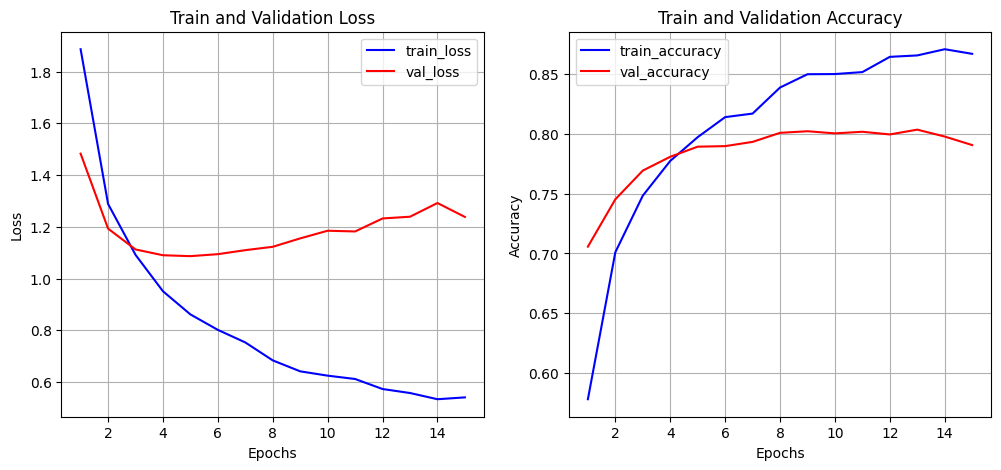

In [49]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
#plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

# 모델 평가 및 예측
테스트 데이터셋을 이용해 모델을 평가합니다.

In [50]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
# [[YOUR CODE]]

model.evaluate(x_test, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7774 - loss: 1.1255


[1.144055962562561, 0.7689225077629089]

# 12-4. CIFAR10 딥러닝 모델

# 데이터 로드 및 전처리
- CIFAR10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다. 데이터셋은 keras.datasets에서 불러올 수 있는 CIFAR10 데이터 셋을 활용합니다.
- 데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.
- 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [51]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from tensorflow.keras.datasets import cifar10

In [52]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.2,
                                                  random_state=111)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [53]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer',
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

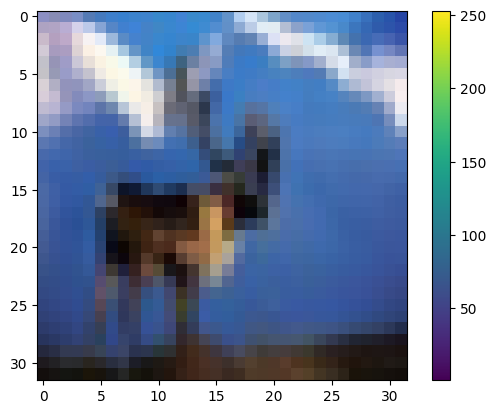

In [54]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
#plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [55]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [56]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
# [[YOUR CODE]]
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)


print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [57]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

# 모델 구성 및 컴파일
BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

In [58]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
# 입력층 + 첫 번째 Dense 블록
model = models.Sequential()
model.add(layers.Input(shape=(3072, )))                # InputLayer
model.add(layers.Dense(2048))                         # Dense
model.add(layers.BatchNormalization())                    # BatchNormalization
model.add(layers.Activation('relu'))                   # Activation
model.add(layers.Dropout(0.5))                     # Dropout

# 두 번째 Dense 블록
model.add(layers.Dense(1024))                         # Dense
model.add(layers.BatchNormalization())                    # BatchNormalization
model.add(layers.Activation('relu'))                   # Activation
model.add(layers.Dropout(0.5))                     # Dropout

# 두 번째 Dense 블록
model.add(layers.Dense(512))                         # Dense
model.add(layers.BatchNormalization())                    # BatchNormalization
model.add(layers.Activation('relu'))                   # Activation
model.add(layers.Dropout(0.5))                     # Dropout

# 출력층
model.add(layers.Dense(10, activation='softmax'))     # Output layer

In [59]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 2048)           │     6,293,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,935,946 (34.09 MB)

 Trainable params: 8,928,778 (34.06 MB)

 Non-trainable params: 7,168 (28.00 KB)

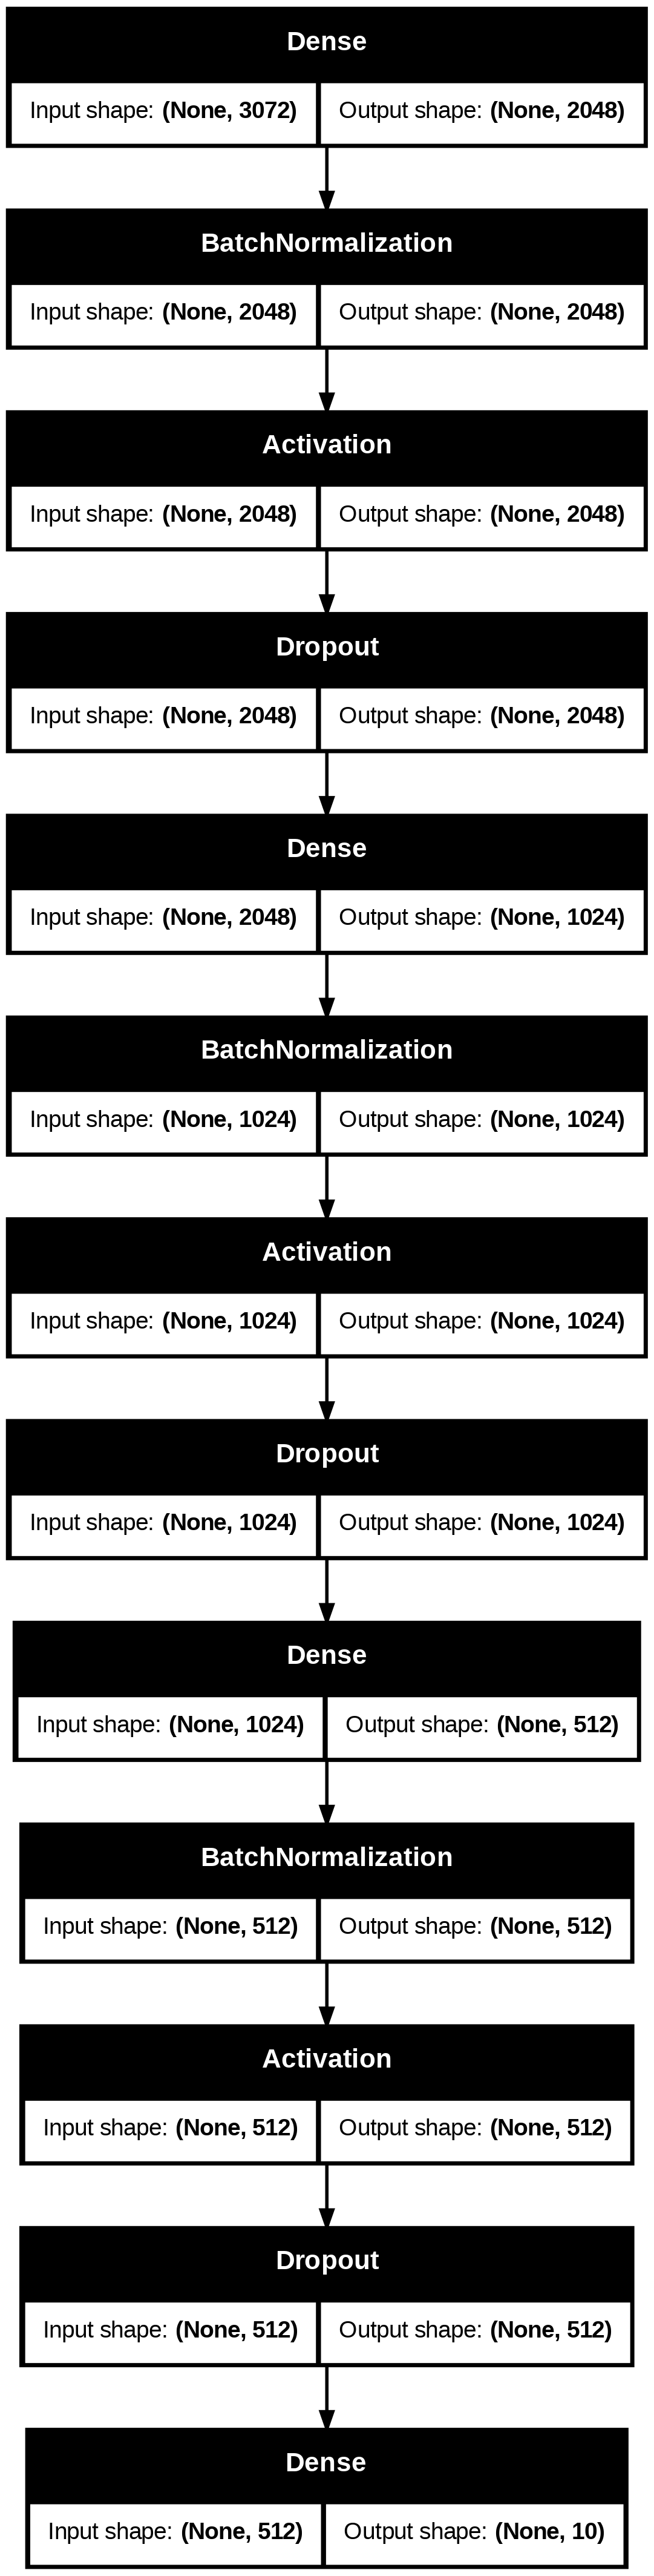

In [60]:
utils.plot_model(model, show_shapes=True)

#모델 학습
ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [64]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]

check_point_cb = callbacks.ModelCheckpoint('CIFAR10_model.h5',
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=30,
                    validation_data=(x_val, y_val),
                    batch_size=256,
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - accuracy: 0.4133 - loss: 1.6437

157/157 ━━━━━━━━━━━━━━━━━━━━ 63s 376ms/step - accuracy: 0.4133 - loss: 1.6435 - val_accuracy: 0.3555 - val_loss: 1.7686
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.4577 - loss: 1.5033

157/157 ━━━━━━━━━━━━━━━━━━━━ 54s 347ms/step - accuracy: 0.4577 - loss: 1.5033 - val_accuracy: 0.3755 - val_loss: 1.7246
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 0.4861 - loss: 1.4376

157/157 ━━━━━━━━━━━━━━━━━━━━ 55s 348ms/step - accuracy: 0.4861 - loss: 1.4376 - val_accuracy: 0.4156 - val_loss: 1.6372
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.5029 - loss: 1.3849

157/157 ━━━━━━━━━━━━━━━━━━━━ 81s 345ms/step - accuracy: 0.5029 - loss: 1.3849 - val_accuracy: 0.4603 - val_loss: 1.5397
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 57s 364ms/step - accuracy: 0.5190 - loss: 1.3374 - val_accuracy: 0.3897 - val_loss: 1.7278
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 54s 345ms/step - accuracy: 0.5278 - loss: 1.3071 - val_accuracy: 0.4578 - val_loss: 1.5467
Epoch 7/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 345ms/step - accuracy: 0.5449 - loss: 1.2792 - val_accuracy: 0.4352 - val_loss: 1.5660
Epoch 8/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 348ms/step - accuracy: 0.5567 - loss: 1.2466 - val_accuracy: 0.4440 - val_loss: 1.5573
Epoch 9/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 349ms/step - accuracy: 0.5680 - loss: 1.2182 - val_accuracy: 0.4171 - val_loss: 1.6164
Epoch 10/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 351ms/step - accuracy: 0.5704 - loss: 1.2016 - val_accuracy: 0.3754 - val_loss: 1.8109
Epoch 11/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 80s 337ms/step - accuracy: 0.5768 - loss: 1.1785 - v

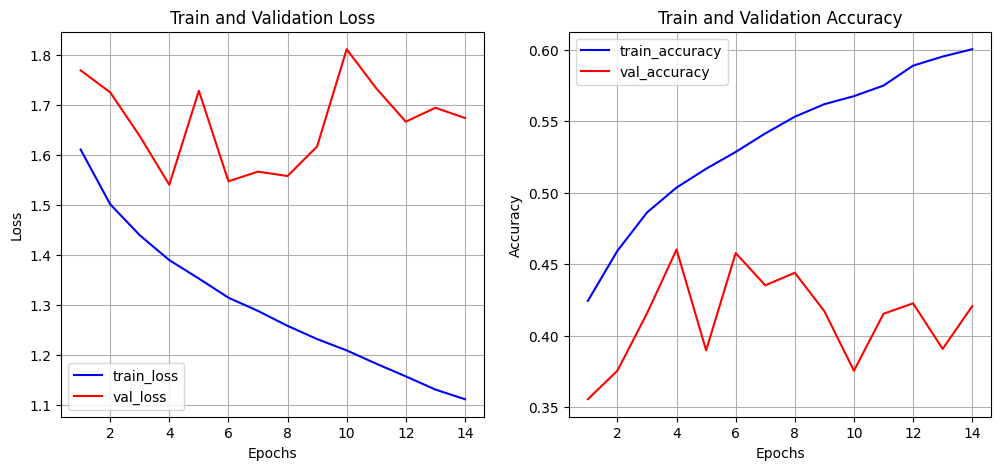

In [65]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
# [[YOUR CODE]]

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

# 모델 평가 및 예측
테스트 데이터셋을 이용해 모델을 평가합니다.

In [66]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.4736 - loss: 1.5352


[1.5398075580596924, 0.46549999713897705]